<a href="https://colab.research.google.com/github/lstrindade/Analise_dados_Pandas/blob/master/Aula2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabalhando com planilhas do Excel

In [8]:
# importando a biblioteca Pandas
import pandas as pd


In [9]:
# Leitura dos arquivos
df1 = pd.read_excel('Aracaju.xlsx')
df2 = pd.read_excel('Fortaleza.xlsx')
df3 = pd.read_excel('Natal.xlsx')
df4 = pd.read_excel('Recife.xlsx')
df5 = pd.read_excel('Salvador.xlsx')

In [11]:
# Juntando todos os arquivos
df = pd.concat([df1, df2, df3, df4, df5])

In [12]:
df['Cidade'].unique()

array(['Aracaju', 'Fortaleza', 'Natal', 'Recife', 'Salvador'],
      dtype=object)

In [13]:
df.tail

<bound method NDFrame.tail of        Cidade       Data  Vendas  LojaID  Qtde
0     Aracaju 2018-01-01  142.00    1520     1
1     Aracaju 2018-01-01   14.21    1522     6
2     Aracaju 2018-01-01   71.55    1520     1
3     Aracaju 2018-01-01    3.01    1521     7
4     Aracaju 2018-01-01   24.51    1522     8
..        ...        ...     ...     ...   ...
235  Salvador 2019-01-03   41.84    1034     1
236  Salvador 2019-01-03  126.29    1035     3
237  Salvador 2019-01-03   38.06    1036     3
238  Salvador 2019-01-03  139.64    1035     1
239  Salvador 2019-01-03  161.41    1037     3

[894 rows x 5 columns]>

In [14]:
df.sample(15)

,Cidade,Data,Vendas,LojaID,Qtde
37,Aracaju,2018-01-01,152.74,1522,9
32,Natal,2019-03-17,244.00,854,2
104,Fortaleza,2019-01-01,40.50,1005,2
44,Natal,2019-01-03,500.00,852,4
186,Natal,2019-01-02,169.09,1036,2
70,Aracaju,2018-01-01,8.44,1523,9
60,Salvador,2019-01-01,96.01,1034,2
19,Salvador,2019-01-01,167.12,1035,1
35,Recife,2019-01-01,148.90,983,1
32,Salvador,2019-01-01,151.27,1035,1


In [15]:
# Verificando o tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [ ]:
df['LojaID'] = df['LojaID'].astype('object')

In [16]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

# Tratando valores faltantes

In [17]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [ ]:
df['Vendas'].fillna(df['Vendas'].mean(), inplace=True)

In [18]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [19]:
# Apagando as linhas com valores nulos
df.dropna(inplace=True)


In [20]:
# Substituindo os valores nulos por zero
df['Vendas'].fillna(0, inplace=True)

In [21]:
# Apagando as linhas com valores nulos com base apenas em 1 coluna
df.dropna(subset=['Vendas'], inplace=True)

In [22]:
# Removendo linhas que estejam com valores faltantes em toda as colunas
df.dropna(how='all', inplace=True)

# Criando nova colunas 

In [23]:
# Criando a coluna Receita
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [24]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [25]:
# Descobrir a quantidade, caso não existisse a coluna no dataset
df['Receita_por_Vendas'] = df['Receita'] / df['Vendas']

In [26]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita_por_Vendas
0,Aracaju,2018-01-01,142.00,1520,1,142.00,1.0
1,Aracaju,2018-01-01,14.21,1522,6,85.26,6.0
2,Aracaju,2018-01-01,71.55,1520,1,71.55,1.0
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0
4,Aracaju,2018-01-01,24.51,1522,8,196.08,8.0


In [27]:
# Retornando a maior receita
df['Receita'].max()

3544.0

In [28]:
# Retornando a menor receita
df['Receita'].min()

3.34

In [29]:
# nlargest, traz as linhas com as n maiores receitas
df.nlargest(3, 'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita_por_Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [30]:
# nsmallest traz as linhas com as n menores receitas
df.nsmallest(3, 'Receita')


,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita_por_Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [31]:
# agrupando as receitas por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [32]:
# Ordenando conjuntos de dados
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita_por_Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


# Trabalhando com datas

In [33]:
df.dtypes

Cidade                        object
Data                  datetime64[ns]
Vendas                       float64
LojaID                         int64
Qtde                           int64
Receita                      float64
Receita_por_Vendas           float64
dtype: object

In [36]:
# Criando uma nova coluna com o ano
df['ano_Venda'] = df['Data'].dt.year

In [37]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita_por_Vendas,Ano_Venda,ano_Venda
73,Recife,2019-01-01,39.71,981,5,198.55,5.0,2019,2019
82,Recife,2019-01-01,29.55,981,6,177.30,6.0,2019,2019
237,Natal,2019-01-03,38.06,1036,3,114.18,3.0,2019,2019
189,Salvador,2019-01-02,139.73,1037,2,279.46,2.0,2019,2019
173,Natal,2019-01-02,31.77,1034,2,63.54,2.0,2019,2019


In [41]:
# Extraindo o mês e o dia
df['Mes_Venda'], df['Dia_Venda']  = (df['Data'].dt.month, df['Data'].dt.day)

In [42]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita_por_Vendas,Ano_Venda,Mes_Venda,Dia_Venda
62,Salvador,2019-01-01,161.02,1037,3,483.06,3.0,2019,1,1
85,Aracaju,2018-01-01,15.17,1521,1,15.17,1.0,2018,1,1
120,Recife,2019-03-02,184.90,982,4,739.60,4.0,2019,3,2
26,Salvador,2019-01-01,183.45,1036,3,550.35,3.0,2019,1,1
105,Aracaju,2018-01-01,24.81,1520,5,124.05,5.0,2018,1,1


In [43]:
# Retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [44]:
# Calculando a diferença de dias
df['Diferenca_dias'] = df['Data'] - df['Data'].min()

In [46]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita_por_Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias
128,Recife,2019-03-02,38.70,982,4,154.80,4.0,2019,3,2,425 days
117,Natal,2019-01-02,39.41,1034,1,39.41,1.0,2019,1,2,366 days
3,Aracaju,2018-01-01,3.01,1521,7,21.07,7.0,2018,1,1,0 days
175,Natal,2019-01-02,16.53,1036,2,33.06,2.0,2019,1,2,366 days
20,Natal,2018-06-08,608.00,852,4,2432.00,4.0,2018,6,8,158 days


In [47]:
# Criando a coluna trimestre
df['Trimestre_Venda'] = df['Data'].dt.quarter

In [48]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita_por_Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
23,Recife,2019-01-01,37.51,982,2,75.02,2.0,2019,1,1,365 days,1
143,Natal,2019-01-02,41.18,1037,2,82.36,2.0,2019,1,2,366 days,1
53,Fortaleza,2019-01-01,11.48,1002,4,45.92,4.0,2019,1,1,365 days,1
21,Natal,2019-02-08,679.00,853,2,1358.00,2.0,2019,2,8,403 days,1
101,Recife,2019-01-01,172.55,983,7,1207.85,7.0,2019,1,1,365 days,1


In [50]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 3)]
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita_por_Vendas,Ano_Venda,Mes_Venda,Dia_Venda,Diferenca_dias,Trimestre_Venda
116,Fortaleza,2019-03-02,79.10,982,2,158.20,2.0,2019,3,2,425 days,1
111,Fortaleza,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
126,Salvador,2019-03-02,41.69,1036,2,83.38,2.0,2019,3,2,425 days,1
111,Recife,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
135,Recife,2019-03-02,10.79,983,5,53.95,5.0,2019,3,2,425 days,1
121,Recife,2019-03-02,41.55,981,3,124.65,3.0,2019,3,2,425 days,1
71,Natal,2019-03-20,840.00,854,3,2520.00,3.0,2019,3,20,443 days,1
141,Fortaleza,2019-03-02,182.75,983,8,1462.00,8.0,2019,3,2,425 days,1
130,Recife,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
122,Salvador,2019-03-02,13.27,1037,1,13.27,1.0,2019,3,2,425 days,1


# Visualização de dados

In [51]:
# Quantidade de vendas por loja 
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
1523     29
852      29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

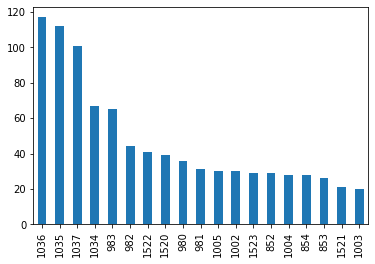

In [52]:
# Gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

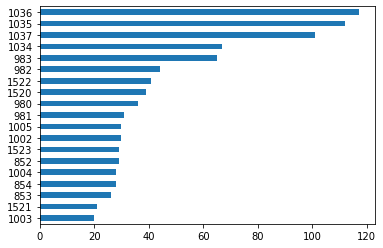

In [56]:
# Gráfico de barras horizontais
df['LojaID'].value_counts(ascending=True).plot.barh();

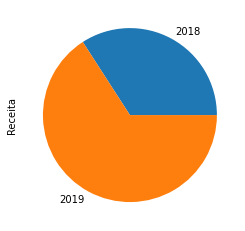

In [58]:
# Gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [59]:
# Total vendas por cidade
df['Cidade'].value_counts()

Salvador     240
Natal        240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

In [65]:
# Personalizando gráficos com a biblioteca matplotlib
import matplotlib.pyplot as plt


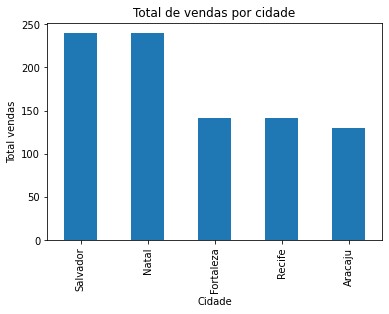

In [66]:
# Adicionando um título e alterando os nomes dos eixos
df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

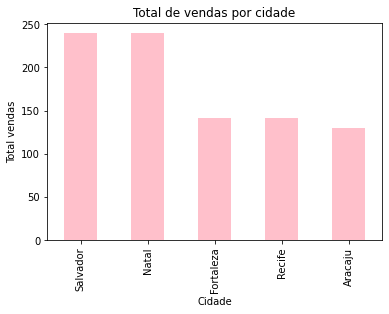

In [69]:
# Alterando a cor 

df['Cidade'].value_counts().plot.bar(title='Total de vendas por cidade', color='pink')
plt.xlabel('Cidade')
plt.ylabel('Total vendas');

In [70]:
# Alterando o estilo
plt.style.use('ggplot')

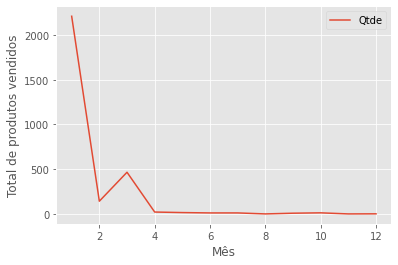

In [71]:
# Criando um gráfico de linhas com legenda
df.groupby(df['Mes_Venda'])['Qtde'].sum().plot(title='Total de produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total de produtos vendidos')
plt.legend()

In [72]:
df.groupby(df['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [73]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df['Ano_Venda'] == 2019]

In [77]:
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

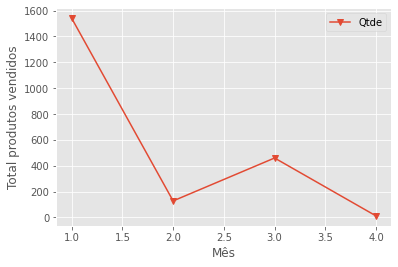

In [75]:
# Total de produtos vendidos por mês: gráfico de linhas com marcador (parâmetro marker pode ser igual a v, o, *)
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker='v')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();

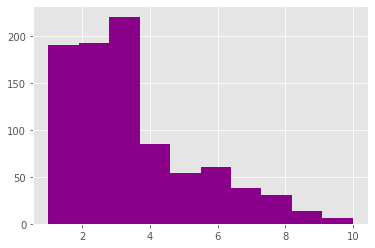

In [80]:
# Histograma
plt.hist(df['Qtde'], color='darkmagenta');

No handles with labels found to put in legend.


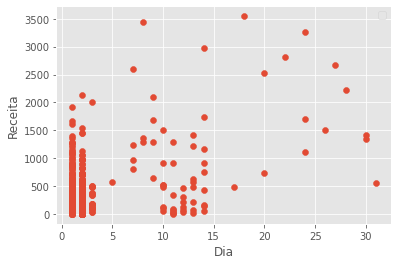

In [83]:
# Gráfico de dispersão
plt.scatter(x=df_2019['Dia_Venda'], y=df_2019['Receita'])
plt.xlabel('Dia')
plt.ylabel('Receita')
plt.legend();

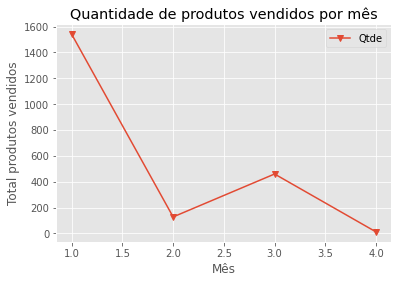

In [84]:
# Salvando em png
df_2019.groupby(df_2019['Mes_Venda'])['Qtde'].sum().plot(marker='v')
plt.title('Quantidade de produtos vendidos por mês')
plt.xlabel('Mês')
plt.ylabel('Total produtos vendidos')
plt.legend();
plt.savefig('grafico QTDE x MES.png')